In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('missingvaluesdone.csv')
df

,age,sex,heart_axis,RR_mean,RR_std,HR,QRS_duration,l5_QRS_duration,PR_interval,l5_PR_interval,...,LF_HF_ratio,dominant_freq,spectral_entropy,mean,median,std,skew,kurt,zero_crossings,condition
0,54.0,0,LAD,970.000000,17.029386,61.855670,97.777778,93.200000,191.111111,188.400000,...,0.386047,2.929688,5.650555,-3.534950e-17,-0.153010,1.0,4.241455,25.360262,77.0,Normal
1,48.0,0,LAD,814.363636,15.155393,73.677160,107.500000,92.333333,194.333333,214.166667,...,1.364808,4.882812,5.293184,-1.278977e-17,-0.280783,1.0,2.106691,5.721974,78.0,MI
2,56.0,0,LAD,681.538462,2.499704,88.036117,115.000000,101.000000,196.000000,202.285714,...,1.181564,1.464844,5.117901,-9.947598e-18,0.071950,1.0,0.243890,4.556635,75.0,Normal
3,56.0,0,LAD,962.000000,53.690471,62.370062,95.400000,90.800000,194.600000,173.000000,...,1.816331,0.976562,5.273018,-4.760636e-17,-0.268608,1.0,2.175067,6.217853,78.0,Normal
4,56.0,0,LAD,679.000000,6.129554,88.365243,92.666667,87.466667,203.866667,192.400000,...,0.402798,1.464844,5.489678,-3.552714e-18,0.044945,1.0,0.863977,7.894348,93.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,63.0,0,LAD,1574.400000,524.307391,38.109756,121.000000,121.000000,200.666667,170.500000,...,3.979517,1.464844,4.532843,-1.989520e-17,-0.051644,1.0,-0.012996,1.331489,109.0,Normal
9389,93.0,0,MID,1195.333333,436.137083,50.195204,126.571429,73.272727,178.857143,178.857143,...,2.249227,4.394531,5.045452,-1.421085e-18,-0.366507,1.0,1.689690,3.695812,70.0,Normal
9390,59.0,1,MID,1168.857143,374.218969,51.332193,104.500000,97.333333,187.250000,181.777778,...,1.234034,2.929688,5.457659,-2.557954e-17,-0.188506,1.0,4.527303,25.735880,133.0,Normal
9391,64.0,1,LAD,944.200000,263.703546,63.545859,80.181818,82.250000,200.000000,200.000000,...,1.796478,2.441406,5.291957,-2.700062e-17,-0.300803,1.0,1.340795,3.167604,88.0,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9393 entries, 0 to 9392
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               9393 non-null   float64
 1   sex               9393 non-null   int64  
 2   heart_axis        9393 non-null   object 
 3   RR_mean           9393 non-null   float64
 4   RR_std            9393 non-null   float64
 5   HR                9393 non-null   float64
 6   QRS_duration      9393 non-null   float64
 7   l5_QRS_duration   9393 non-null   float64
 8   PR_interval       9393 non-null   float64
 9   l5_PR_interval    9393 non-null   float64
 10  QT_interval       9393 non-null   float64
 11  l5_QT_interval    9393 non-null   float64
 12  T_duration        9393 non-null   float64
 13  l5_T_duration     9393 non-null   float64
 14  l5_R_amp          9393 non-null   float64
 15  l5_S_amp          9393 non-null   float64
 16  l5_R_S_ratio      9393 non-null   float64


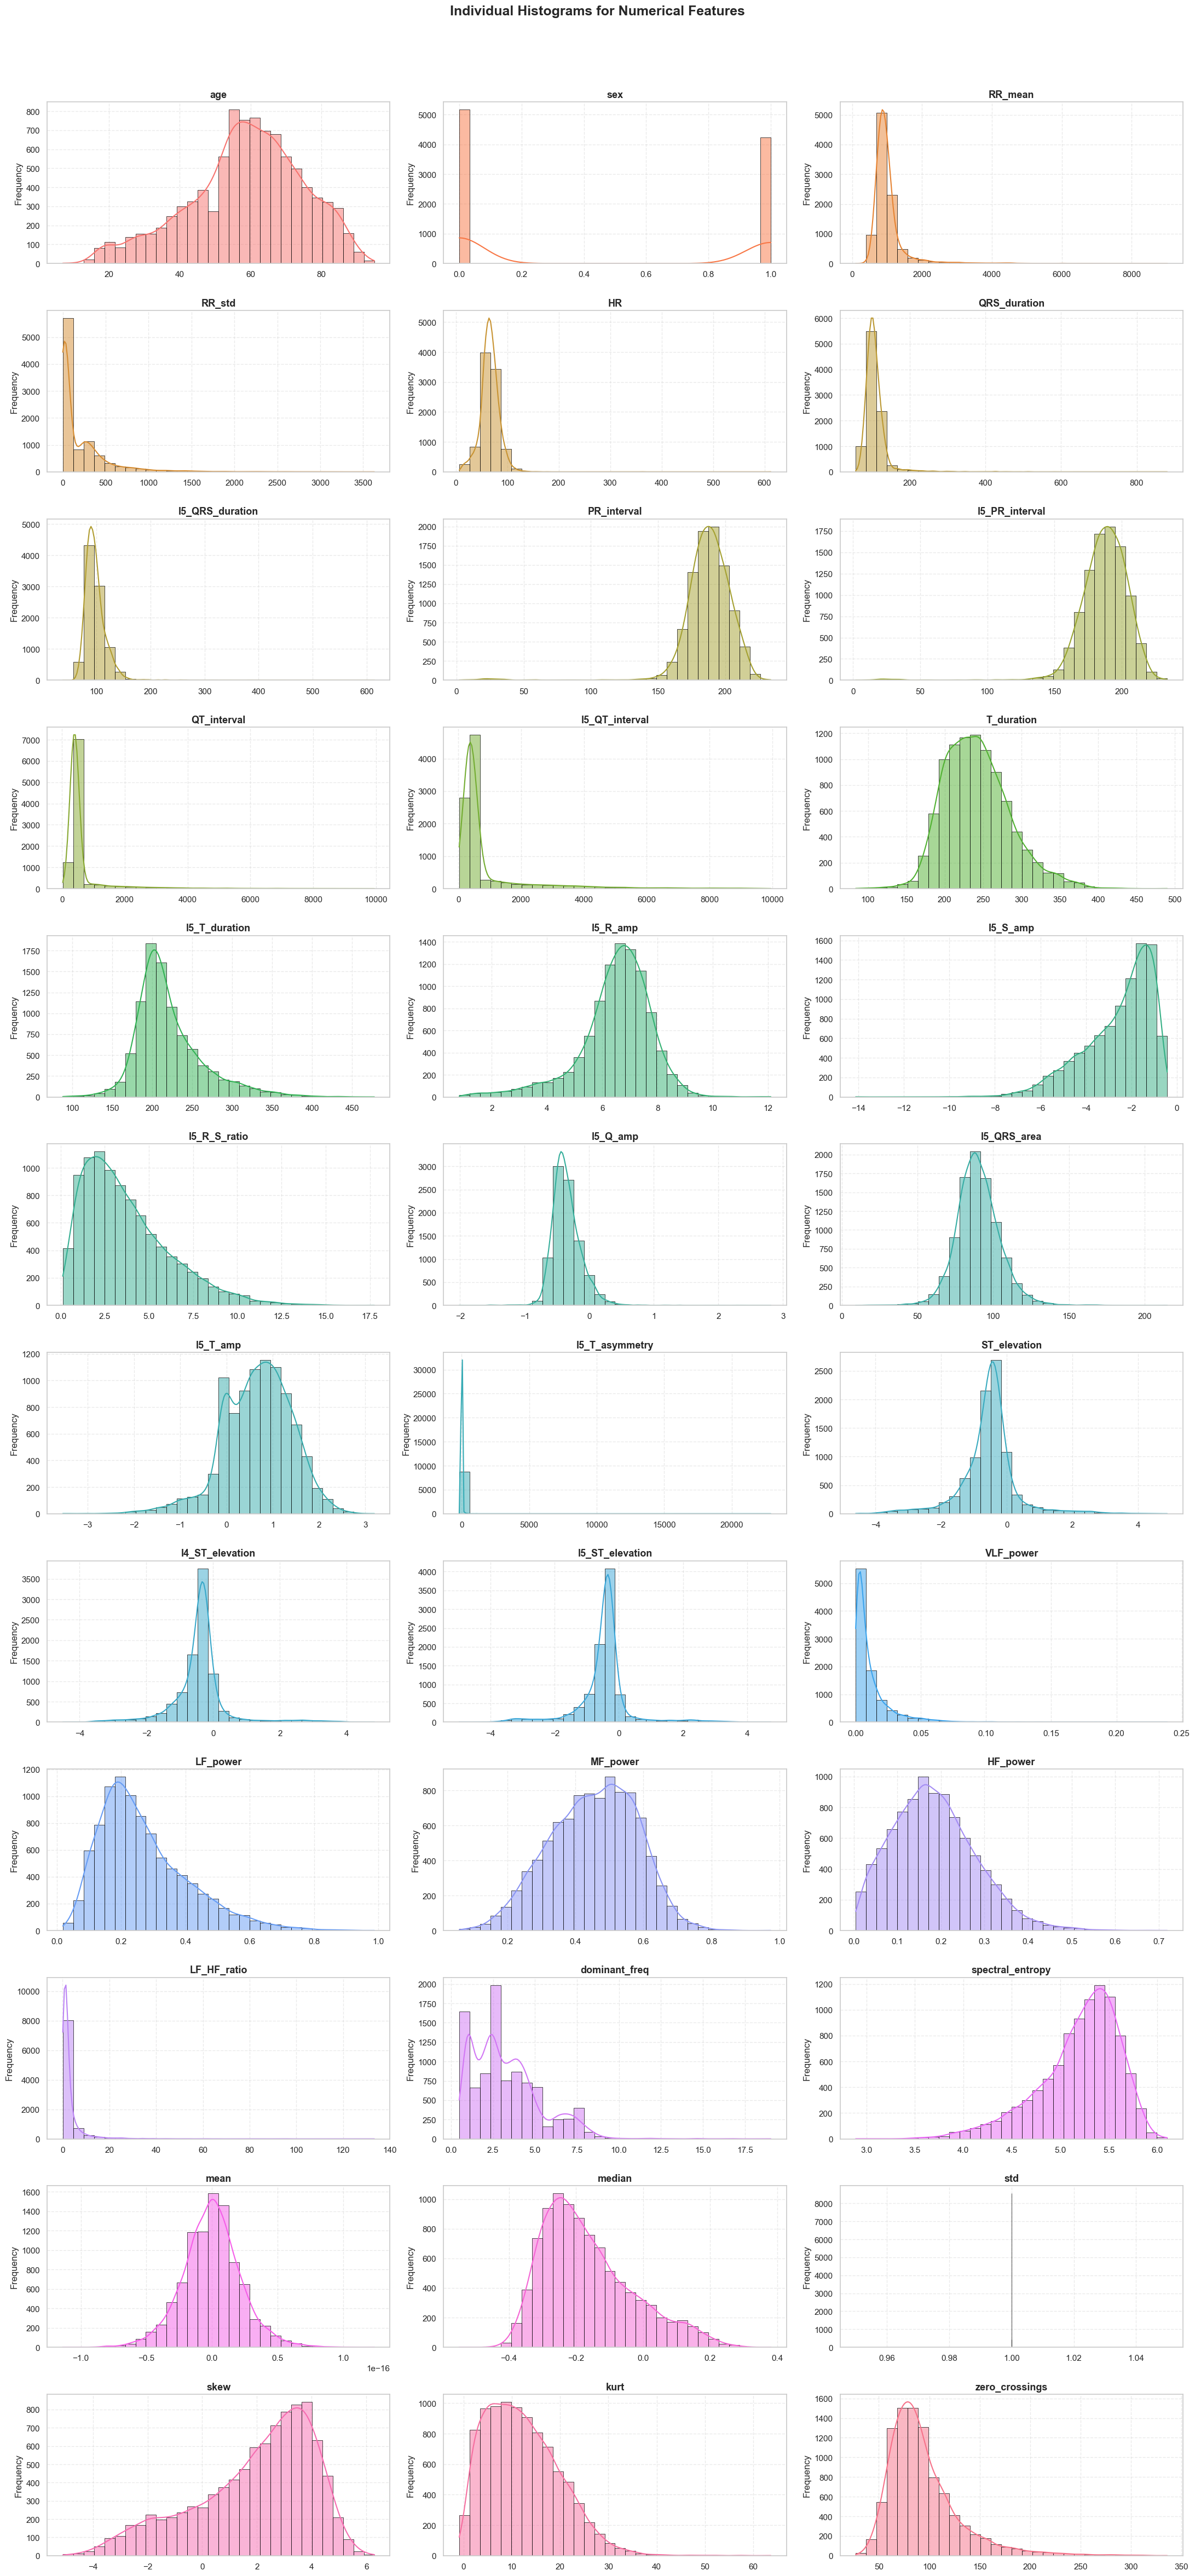

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset
df = pd.read_csv("missingvaluesdone.csv")

# Select numerical columns only
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Set seaborn theme for style
sns.set(style="whitegrid")

# Choose a color palette
palette = sns.color_palette("husl", len(numerical_df.columns))  # vibrant colors

# Plot layout config
num_cols = numerical_df.columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Plot
plt.figure(figsize=(22, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    color = palette[i % len(palette)]
    sns.histplot(numerical_df[col], kde=True, bins=30, color=color, edgecolor='black', linewidth=0.5)
    plt.title(f'{col}', fontsize=13, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Individual Histograms for Numerical Features', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



C:\Users\estya\AppData\Local\Temp\ipykernel_12124\4159099229.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette=palette, edgecolor="black")
C:\Users\estya\AppData\Local\Temp\ipykernel_12124\4159099229.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette=palette, edgecolor="black")
C:\Users\estya\AppData\Local\Temp\ipykernel_12124\4159099229.py:26: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x=col, palette=palette, edgecolor="black")


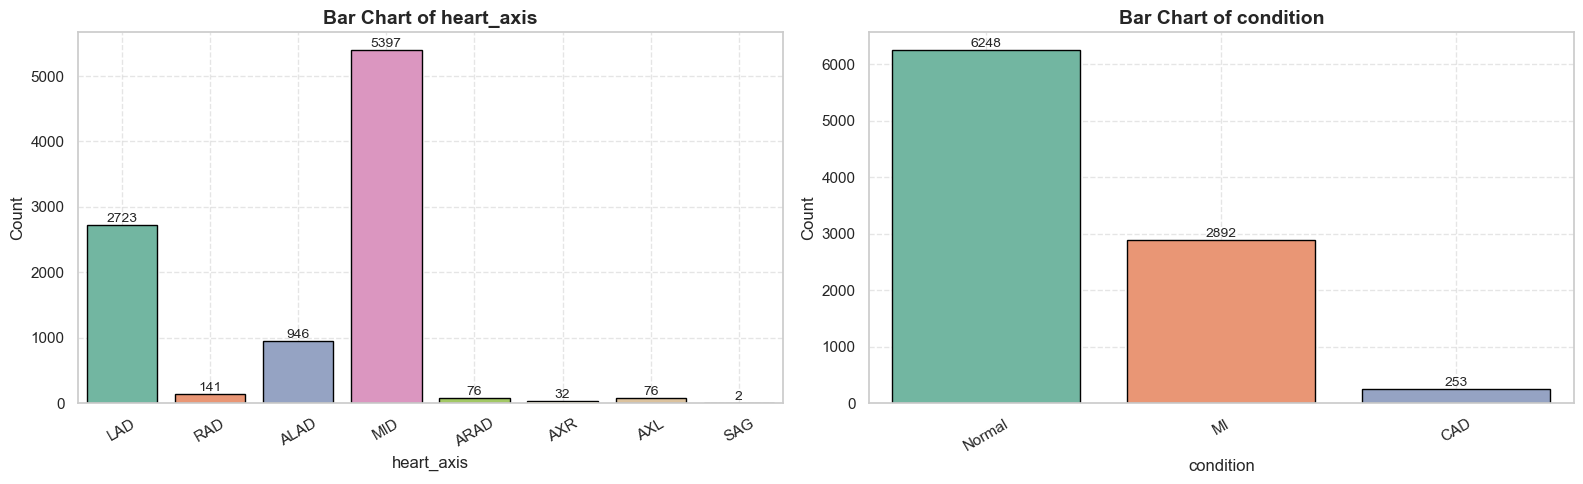

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset
df = pd.read_csv("missingvaluesdone.csv")

# Select only categorical columns (type: object)
categorical_df = df.select_dtypes(include=['object'])

# Determine layout
num_cats = categorical_df.columns
n_cols = 2
n_rows = math.ceil(len(num_cats) / n_cols)

# Set visual style
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Plot
plt.figure(figsize=(16, n_rows * 5))

for i, col in enumerate(num_cats, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(data=df, x=col, palette=palette, edgecolor="black")
    plt.title(f'Bar Chart of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
